In [1]:
import os
import shutil#
os.chdir('/content')
! git clone --branch errors https://github.com/mwl10/hetvae
os.chdir('/content/hetvae')
! pip install -r requirements.txt
os.chdir('/content/hetvae/src')
import numpy as np
import torch
import torch.optim as optim
import models
from argparse import Namespace
import torch.optim as optim
import utils
import my_utils
import pandas as pd
import importlib
import time
import vae_models
from glob import glob
import matplotlib.pyplot as plt
import sys
from dataset import DataSet
%matplotlib inline

Cloning into 'hetvae'...
remote: Enumerating objects: 3961, done.
remote: Counting objects: 100% (997/997), done.
remote: Compressing objects: 100% (839/839), done.
remote: Total 3961 (delta 197), reused 247 (delta 158), pack-reused 2964
Receiving objects: 100% (3961/3961), 39.00 MiB | 35.88 MiB/s, done.
Resolving deltas: 100% (1142/1142), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.5 MB/s 
     |████████████████████████████████| 81 kB 11.4 MB/s 
     |████████████████████████████████| 149 kB 85.7 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 15.7 MB 22.6 MB/s 
     |████████████████████████████████| 308 kB 81.0 MB/s 
     |████████████████████████████████| 112 kB 74.6 MB/s 
     |████████████████████████████████| 2.1 MB 60.6 MB/s 
     |████████████████████████████████| 596 kB 60.8 MB/s 
     |████████████████████████████

10
dims of /content/hetvae/data/EDELSON/NGC4593_W2.dat:	(147, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_W1.dat:	(260, 3)
dims of /content/hetvae/data/EDELSON/NGC4593_SX.dat:	(190, 3)
dims of /content/hetvae/data/EDELSON/NGC4593_M2.dat:	(148, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_W2.dat:	(259, 3)
dims of /content/hetvae/data/EDELSON/NGC4593_W1.dat:	(150, 3)
dims of /content/hetvae/data/EDELSON/NGC4593_HX.dat:	(190, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_M2.dat:	(248, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_SX.dat:	(267, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_HX.dat:	(267, 3)
147
0.2453397398015255
260
0.7972744273016689
190
0.5528025750159273
148
0.1958185068622257
259
1.2163946886530967
150
0.1485483244942861
190
0.3712588991265487
248
1.057708413559722
267
0.20775755703578
267
0.2963210742461054
generating 20 new sample of each example in the dataset & appending them 
 old dataset length: 10
new dataset length: 210
created union_x attribute of

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/loc

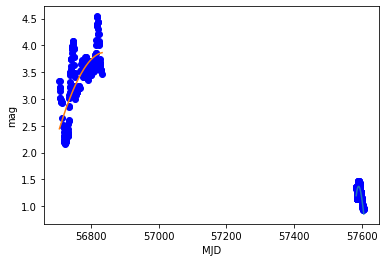

In [137]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Edelson data 
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/EDELSON/*')

# hypers: 
Edelson = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_graham(plot=True, index=0) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()
print(
    Edelson.files, '\n',
    Edelson.union_x.shape,
    Edelson.dataset.shape,
  )
union_x = Edelson.union_x


Edelson = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_graham(plot=True, index=4) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()
Edelson.dataset= Edelson.dataset[:1, :, :]
print(Edelson.dataset.shape)
# hypers: 


# plt.scatter(Edelson.dataset[1,:-100,0], Edelson.dataset[1,:-100,1])
# Edelson.union_x.shape

974
dims of /content/hetvae/data/CAT/CSS/CSS170320:110636+193253_20.34.dat:	(271, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170925:235758-120558_18.32.dat:	(320, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170321:125647+452323_19.55.dat:	(591, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170928:220238+103029_18.65.dat:	(476, 3)
dims of /content/hetvae/data/CAT/CSS/CSS171011:010004-132449_19.01.dat:	(302, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170318:140157+452716_19.29.dat:	(591, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170131:135357-074301_19.9.dat:	(282, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170323:083128+192242_19.0.dat:	(576, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170924:000329+142215_19.13.dat:	(141, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170930:072702+525141_18.55.dat:	(908, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170626:144534+461748_20.55.dat:	(332, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170202:100034+455823_19.25.dat:	(253, 3)
dims of /content/hetvae/da

/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


dims of /content/hetvae/data/CAT/CSS/CSS170201:084317+101227_19.43.dat:	(275, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170928:014736+155300_19.65.dat:	(418, 3)
dims of /content/hetvae/data/CAT/CSS/CSS171001:030632+143102_18.92.dat:	(735, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170924:001108+195550_18.68.dat:	(358, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170130:141645+432425_19.49.dat:	(438, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170325:125540+395120_18.55.dat:	(802, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170627:130414+461143_20.75.dat:	(148, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170327:100524+275019_19.39.dat:	(450, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170925:042038-084453_18.95.dat:	(315, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170221:100018+192306_19.91.dat:	(443, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170201:114232+200717_20.13.dat:	(175, 3)
dims of /content/hetvae/data/CAT/CSS/CSS171001:004742+155939_18.04.dat:	(511, 3)
dims of /content/hetvae/data

/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


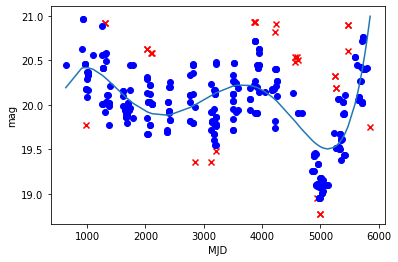

In [225]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data 
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/CAT/*/*')


Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_graham(plot=False, index=0, std_threshold=1) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()
print(
    Catalina.files, '\n',
    Catalina.union_x.shape,
    Catalina.dataset.shape,
  )
union_x = Catalina.union_x


Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_graham(plot=True, index=18, std_threshold=1) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()

Catalina.dataset= Catalina.dataset[18:19, :, :]
print(Catalina.dataset.shape)
# hypers: 


# plt.scatter(Catalina.dataset[1,:-100,0], Catalina.dataset[1,:-100,1])
# Catalina.union_x.shape

621
0.5096901962886006
585
0.7238968017976714
598
0.6490217293408855
82
0.3811101800439146
570
0.7443010199958523
created union_x attribute of length 2444
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (5, 619, 3), instead of a list of numpy arrays
619
1.515987368138287
583
1.4847727117884109
598
1.4190949857376876
82
1.4474996290568574
566
1.6008337016039824
created union_x attribute of length 2424
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (5, 613, 3), instead of a list of numpy arrays


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]
/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


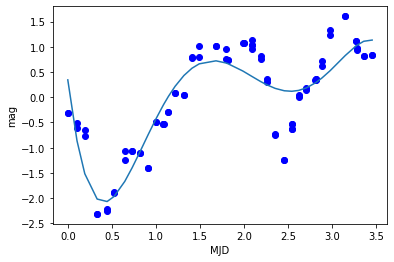

In [167]:
#------------------------------
# AGN Preprocessing, we have a DF w/ OBJECT , FILTER, MJD, FLUX, ERROR
#------------------------------

agn_df = pd.read_csv('/content/hetvae/data/AGN_1H2106-099/1H2106-099_latest_lcs_pyroa.csv')
# handle formatting for new AGN
lcs = []
for lc_df in agn_df.groupby('Filter'):
    lc = lc_df[1][['MJD', 'Flux', 'Error']].to_numpy()
    lcs.append(lc)
# lcs[0] = lcs[0][lcs[0][:,0].argsort()]
# lcs[0] = np.concatenate((lcs[0][:10], lcs[0][410:]))

# lcs = [lcs[0], lcs[0]]
AGN_1H2106 = DataSet()
AGN_1H2106.dataset = lcs # skip add files part

AGN_1H2106 = AGN_1H2106.handle_dups() \
                      .prune_graham() \
                      .normalize(normalize_y='individual', normalize_x='individual', x_by_range=False, y_by_range=False) \
                      .reorder() \
                      .set_union_x() \
                      .zero_fill() \
                      .error_to_sample_weight() \
                      .set_target_x()

union_x = AGN_1H2106.union_x
# lcs = [lcs[0], lcs[0]]
AGN_1H2106 = DataSet()
AGN_1H2106.dataset = lcs # skip add files part

AGN_1H2106 = AGN_1H2106.handle_dups() \
                      .prune_graham(plot=True, index=3) \
                      .normalize(normalize_y='individual', normalize_x='individual', x_by_range=False, y_by_range=False) \
                      .reorder() \
                      .set_union_x() \
                      .zero_fill() \
                      .error_to_sample_weight() \
                      .set_target_x()

AGN_1H2106.dataset = AGN_1H2106.dataset[3:4, :, :]

In [168]:
args = Namespace(batch_size=16, bound_variance=False, const_var=False,dropout=0.19462264721791603, 
                 elbo_weight=4.108914123847402, embed_time=64, enc_num_heads=4, intensity=True, k_iwae=1, kl_annealing=False, 
                 kl_zero=False, latent_dim=8, lr=0.001, mixing='concat_and_mix', mse_weight=4.060280688730988, net='hetvae', 
                 niters=1000, norm=True, normalize_input='znorm', num_ref_points=16, rec_hidden=8, recon_loss=False, 
                 sample_tp=0.4733820088130086, save=True, seed=0, shuffle=True, std=0.1, var_per_dim=False, width=64)



In [169]:
DIM = 1
# definitly want a decaying error rate...
#scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[], gamma=0.1)
seed = args.seed
torch.manual_seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [170]:
LightCurves = AGN_1H2106.dataset
#np.concatenate((AGN_1H2106.dataset, AGN_1H2106.subsampled_mask[:,:,np.newaxis], AGN_1H2106.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((AGN_1H2106.dataset, AGN_1H2106.subsampled_mask[:,:,np.newaxis], AGN_1H2106.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((Catalina.dataset, Catalina.subsampled_mask[:,:,np.newaxis], Catalina.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 

print(LightCurves.shape)


(1, 613, 3)


In [172]:
training, valid = np.split(LightCurves, [int(np.floor(1*len(LightCurves)))])# shuffle?

train_loader = torch.utils.data.DataLoader(training, batch_size=args.batch_size)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=args.batch_size)
       

In [217]:
net = models.load_network(args, DIM, torch.Tensor(union_x))
#net = models.load_network(args, DIM, torch.Tensor(Edelson.union_x))  
params = list(net.parameters())
optimizer = optim.Adam(params, lr=0.003730623026039245)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, gamma=0.5, step_size=200)

In [205]:
for g in optimizer.param_groups:
    print(g['lr'])
    g['lr'] = 0.001463275753032352

0.003730623026039245


In [218]:
AGN_1H2106.set_target_x(num_points=200)
recons = []
end_times = []
nlls = []
mses = []
epochs = []

In [219]:
start = time.time()

for epoch in range(1, 1501): #args.niters + 1):
    nll, mse = my_utils.train(net, optimizer, epoch, train_loader, args)
    scheduler.step() 
    if epoch % 10 == 0 or epoch == 1:
        epochs.append(epoch)
        nlls.append(nll)
        mses.append(mse)
        end = time.time()
        end_times.append(end)
        reconstruction, qz_mean, qz_std = viz_per_example(AGN_1H2106.dataset[0], AGN_1H2106.target_x[0], net, num_points=200, device=device, k_iwae=50)
        recons.append(reconstruction)

Iter: 100, train loss: 6.0705, avg nll: 1.0180, avg kl: 0.0420, mse: 0.460649, mae: 0.567040
Iter: 200, train loss: 5.9359, avg nll: 0.9983, avg kl: 0.1648, mse: 0.434952, mae: 0.558439
Iter: 300, train loss: 1.3269, avg nll: 0.2224, avg kl: 0.1146, mse: 0.090162, mae: 0.237364
Iter: 400, train loss: 0.8630, avg nll: 0.1204, avg kl: 0.1075, mse: 0.079801, mae: 0.238549
Iter: 500, train loss: 0.4044, avg nll: 0.0185, avg kl: 0.0866, mse: 0.072127, mae: 0.211029
Iter: 600, train loss: -0.9344, avg nll: -0.2862, avg kl: 0.0933, mse: 0.050091, mae: 0.165873
Iter: 700, train loss: -1.5363, avg nll: -0.4264, avg kl: 0.1044, mse: 0.042523, mae: 0.145497
Iter: 800, train loss: -2.2916, avg nll: -0.6055, avg kl: 0.1124, mse: 0.036970, mae: 0.135362
Iter: 900, train loss: -2.3259, avg nll: -0.6196, avg kl: 0.1169, mse: 0.042345, mae: 0.133041
Iter: 1000, train loss: -2.3856, avg nll: -0.6363, avg kl: 0.1271, mse: 0.043461, mae: 0.132176
Iter: 1100, train loss: -2.9546, avg nll: -0.7687, avg kl: 

In [195]:
AGN_1H2106.error_to_sample_weight()
AGN_1H2106.dataset[0,:10,2]

/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


array([0.05406744, 0.07659553, 0.08560677, 0.08560677, 0.09461801,
       0.08110115, 0.10813487, 0.10813487, 0.03604496, 0.03604496],
      dtype=float32)

In [220]:
elapsed = [f'{round((end - start),3)}' for end in end_times]
mses = [round(float(mse), 3) for mse in mses]
nlls = [round(float(nll), 3) for nll in nlls]
elapsed.insert(0,'0')
print(elapsed, mses, nlls)

['0', '0.022', '0.152', '0.289', '0.428', '0.573', '0.709', '0.852', '0.99', '1.14', '1.281', '1.425', '1.562', '1.711', '1.849', '1.986', '2.129', '2.267', '2.413', '2.553', '2.697', '2.836', '2.977', '3.129', '3.27', '3.404', '3.536', '3.666', '3.798', '3.93', '4.063', '4.197', '4.329', '4.462', '4.596', '4.729', '4.864', '5.0', '5.139', '5.271', '5.403', '5.538', '5.671', '5.806', '5.939', '6.07', '6.203', '6.336', '6.478', '6.619', '6.761', '6.905', '7.048', '7.202', '7.351', '7.493', '7.635', '7.772', '7.914', '8.056', '8.202', '8.344', '8.484', '8.627', '8.772', '8.915', '9.053', '9.202', '9.34', '9.485', '9.624', '9.769', '9.903', '10.049', '10.185', '10.329', '10.468', '10.611', '10.744', '10.878', '11.018', '11.157', '11.298', '11.438', '11.578', '11.713', '11.855', '12.001', '12.144', '12.305', '12.444', '12.59', '12.73', '12.874', '13.012', '13.157', '13.295', '13.442', '13.58', '13.719', '13.861', '14.004', '14.144', '14.287', '14.437', '14.575', '14.715', '14.853', '14.998

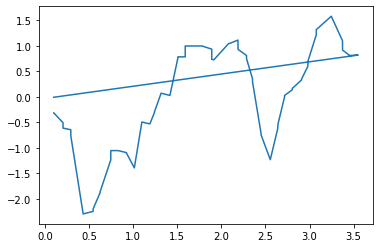

In [221]:
# denormalize reconstructions and the example we're going to animate

i = 0
xmean, xstd = AGN_1H2106.x_mean_std[i]
ymean, ystd = AGN_1H2106.y_mean_std[i]

denorm_recons = []

for recon in recons:
    denorm_recon = recon.copy()
    denorm_recon[:,0] = (denorm_recon[:,0]) + xmean
    denorm_recon[:,1] = (denorm_recon[:,1] * ystd) + ymean
    denorm_recon[:,2] = denorm_recon[:,2] * ystd
    denorm_recons.append(denorm_recon)


ex= AGN_1H2106.dataset[i].copy()

ex[:,0] = (ex[:,0]) + xmean
ex[:,1] = (ex[:,1]) * ystd + ymean
ex[:,2] = ex[:,2] * ystd

plt.plot(ex[:,0], ex[:,1])
# plt.plot(recons[0][:,0], recons[0][:,1])

In [43]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

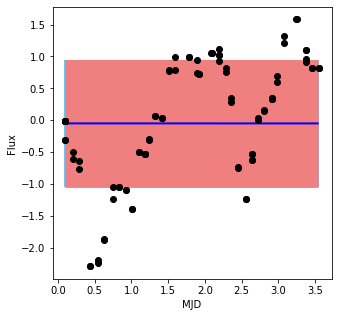

In [222]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
def animate(i):
    x = denorm_recons[i][:,0]
    y = denorm_recons[i][:,1]
    yerr = denorm_recons[i][:,2]

    ax.clear()
    w=2.0
    ax.fill_between(x, y - yerr, y+yerr, color='lightcoral', zorder=30)
    ax.plot(x, y, c='b', lw=w, label='Reconstructions', zorder=40)
    ax.scatter(ex[:,0], ex[:,1], c='black', zorder=50)
    ax.errorbar(x, y ,yerr=yerr,  ecolor='#65c9f7', c='b', lw=w, label='Reconstructions')
    #ax.text(57585, 1, f'epoch: {epochs[i]}, mse: {mses[i]}, \n nll: {nlls[i]}, elapsed time: {elapsed[i]} sec', fontsize=10)
    #ax.set_xlim([0,1])
    #ax.set_ylim([0.8,1.5])
    ax.set_xlabel('MJD')
    ax.set_ylabel('Flux')
    #ax.set_title()
    

ani = FuncAnimation(fig, animate, frames=150, interval=100, repeat=False)

In [223]:
ani

In [77]:
# visualisation for one light curve w/ increasing number of points
def viz_per_example(example, target_x, net, num_points=40, device="cuda", k_iwae=10, frac=1): 
    example = example[np.newaxis, :,:]
    target_x = target_x[np.newaxis, :, np.newaxis]
    np.random.seed(0)
    with torch.no_grad(): 
        # if torch.is_tensor(example):
        #     example = example.cpu().numpy()
        example = torch.tensor(example)
        # make new masks relative to fraction of points we got to predict w/ 
        subsampled_mask, recon_mask = my_utils.make_masks(example, frac=frac)
        #example = np.concatenate((example, smask[:,:,np.newaxis], rmask[:,:,np.newaxis], target_x), axis=-1) # format the masks 
        example = torch.cat((example, torch.unsqueeze(subsampled_mask, 2), torch.unsqueeze(recon_mask, 2), torch.tensor(target_x)), axis=-1)

        #example = torch.tensor(example)
        example = example.to(device)
        
        subsampled_mask = example[:,:,3:4]
        context_y = torch.cat((example[:,:, 1:2] * subsampled_mask, subsampled_mask), -1)
        px, qz = net.get_reconstruction(example[:,:, 0], context_y, example[:,:,5], num_samples=k_iwae)

        qz_mean = (qz.mean.cpu().numpy())
        qz_std = (torch.exp(0.5 * qz.logvar).cpu().numpy())
        px_mean = px.mean.cpu().numpy()
        px_std = torch.exp(0.5 * px.logvar).cpu().numpy()
        example = example.cpu().numpy()

        px_mean = np.mean(px_mean, axis=0)[0,:num_points,0]
        px_std = np.mean(px_std, axis=0)[0,:num_points,0]
        target_x = target_x[0,:num_points,0]
        w=2.0
        #plt.figure(figsize=(30, 10))
        #plt.fill_between(target_x, px_mean - 2*px_std, px_mean+2*px_std, color='gray')

        # plt.plot(target_x, px_mean, c='b', lw=w, label='Reconstructions', zorder=20)
        # plt.scatter(example[0,:,0], example[0,:,1])
        # plt.errorbar(target_x, px_mean ,yerr=px_std,  ecolor='#65c9f7', c='b', lw=w, label='Reconstructions')

        #plt.show()
        reconstruction = np.concatenate((target_x[:,np.newaxis], px_mean[:,np.newaxis], px_std[:,np.newaxis]), axis=1)
        #print(f'qz shape: {qz_mean.shape}')
        #print(f'reconstructed example: {reconstruction.shape}')
        return reconstruction, qz_mean,qz_std

